Понижение размерности данных. Метод главных компонент

1. Импортируйте датасет Ирисы (https://scikit-learn.org/stable/datasets.html).

In [1]:
from sklearn.datasets import load_iris
data = load_iris()

2. В переменную X передайте данные (data) из датасета Ирисы, в y - метки (target).

In [2]:
X = data.data
y = data.target

3. Преборазуйте data в датафрейм df Pandas. Выведите первые 3-и строки df на печать.

In [3]:
import pandas as pd


df = pd.DataFrame(data=data.data, columns=data.feature_names)

4. Выполните визуализацию данных, используя матрицу рассеяния в pandas (https://www.codecamp.ru/blog/scatter-matrix-pandas/).

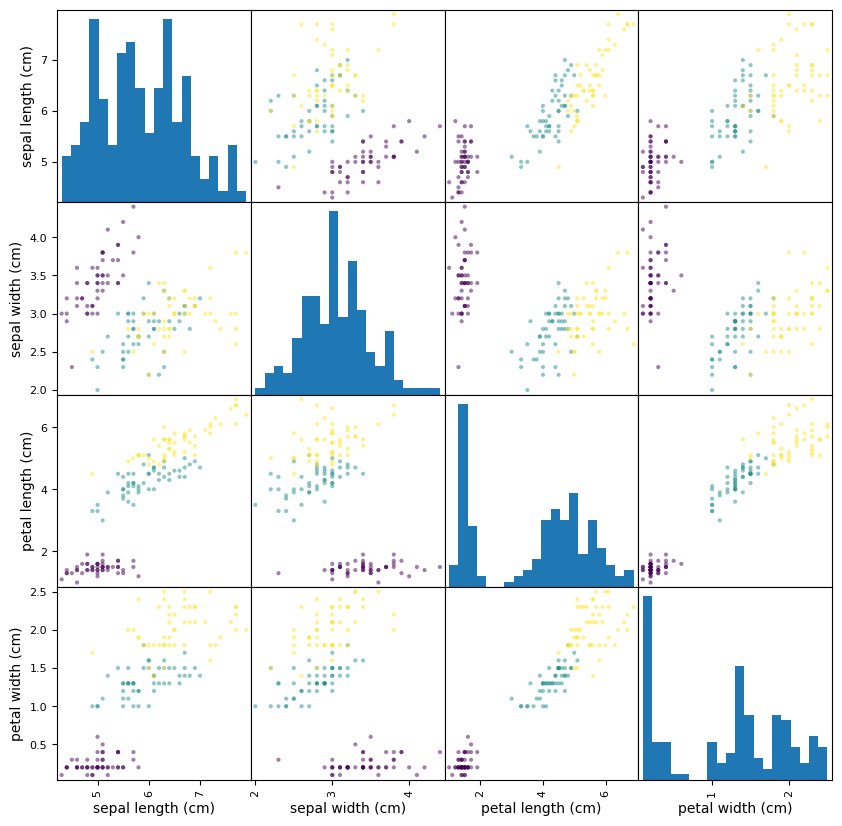

In [4]:
pl = pd.plotting.scatter_matrix(df, c=y, figsize=(10,10), hist_kwds={'bins': 20})

По графикам видно, что лучше всего цветки разбиваются по измерениям длины и ширины лепестка (petal length, petal width).

5. Выполните уменьшение размерности данных датасета Iris до 2, используя метод главных компонент (PCA) (https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fvitalflux.com%2Fpca-explained-variance-concept-python-example%2F).

In [5]:
#импортируйте PCA
from sklearn.decomposition import PCA

#создайте объект pca класса PCA с размерностью 2
pca = PCA(n_components=2)

#выполните обучение модели
pca.fit(X)

# уменьшите размерность X
X_pca = pca.transform(X)


X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


6. Выполните визуализацию результата, используя диаграмму рассеяния scatter библиотеки matplotlib.

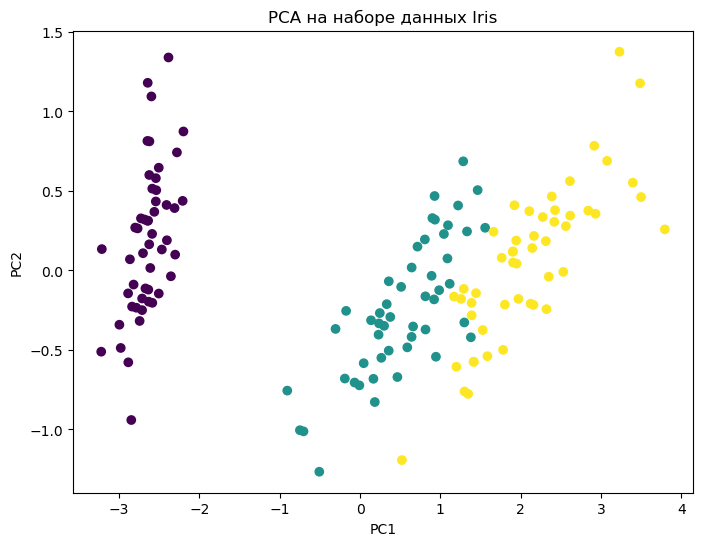

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.title("PCA на наборе данных Iris")
plt.show()

7. Выполните оценку количества компонент, необходимого для описания данных, используя интегральную долю объяснимой дисперсии (англ. explained variance ratio).

In [12]:
explained_variance_ratio = pca.explained_variance_ratio_


print("Доля объясненной дисперсии для каждой компоненты:", explained_variance_ratio)
print("Накопленная доля объясненной дисперсии:", explained_variance_ratio.cumsum())

Доля объясненной дисперсии для каждой компоненты: [0.92461872 0.05306648]
Накопленная доля объясненной дисперсии: [0.92461872 0.97768521]


Достаточно ли было 2-х компонент для описания данных?

Да, двух компонент оказалось достаточно для описания данных.
Вот почему:
Доля объясненной дисперсии для первой компоненты составляет 92.46%, что уже описывает большую часть вариаций в данных.
Вторая компонента добавляет еще 5.31% к общей дисперсии.

Накопленная доля объясненной дисперсии для двух компонент составляет 97.77%, что означает, что эти две компоненты объясняют почти 98% всей вариации в данных.

Вывод:
Для набора данных Iris двух компонент вполне достаточно, поскольку они объясняют почти всю информацию (98%) о вариации данных.
Это позволяет визуализировать данные и работать с ними в 2D-пространстве с минимальной потерей информации.